# ADA Project : Dunnhumby dataset, Tell me what you buy and I will tell you who you are



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Abstract" data-toc-modified-id="Abstract-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Abstract</a></span></li><li><span><a href="#Data-clean-up-and-overview-of-information-available:" data-toc-modified-id="Data-clean-up-and-overview-of-information-available:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data clean up and overview of information available:</a></span><ul class="toc-item"><li><span><a href="#Demographic-data:" data-toc-modified-id="Demographic-data:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Demographic data:</a></span></li><li><span><a href="#Product-data:" data-toc-modified-id="Product-data:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Product data:</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Number-of-products:" data-toc-modified-id="Number-of-products:-2.2.0.1"><span class="toc-item-num">2.2.0.1&nbsp;&nbsp;</span>Number of products:</a></span></li><li><span><a href="#Product-departments:" data-toc-modified-id="Product-departments:-2.2.0.2"><span class="toc-item-num">2.2.0.2&nbsp;&nbsp;</span>Product departments:</a></span></li></ul></li></ul></li><li><span><a href="#Household-data:" data-toc-modified-id="Household-data:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Household data:</a></span><ul class="toc-item"><li><span><a href="#Demographic-categories:" data-toc-modified-id="Demographic-categories:-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Demographic categories:</a></span></li><li><span><a href="#Household-composition-inconsistencies:" data-toc-modified-id="Household-composition-inconsistencies:-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Household composition inconsistencies:</a></span></li><li><span><a href="#Demographic-distributions:" data-toc-modified-id="Demographic-distributions:-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Demographic distributions:</a></span></li></ul></li><li><span><a href="#Transaction-data:" data-toc-modified-id="Transaction-data:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Transaction data:</a></span><ul class="toc-item"><li><span><a href="#Quick-overview:" data-toc-modified-id="Quick-overview:-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Quick overview:</a></span><ul class="toc-item"><li><span><a href="#Number-of-total-transactions:" data-toc-modified-id="Number-of-total-transactions:-2.4.1.1"><span class="toc-item-num">2.4.1.1&nbsp;&nbsp;</span>Number of total transactions:</a></span></li><li><span><a href="#Number-of-total-purchase-occasions:" data-toc-modified-id="Number-of-total-purchase-occasions:-2.4.1.2"><span class="toc-item-num">2.4.1.2&nbsp;&nbsp;</span>Number of total purchase occasions:</a></span></li><li><span><a href="#Number-of-households-in-transaction-dataset:" data-toc-modified-id="Number-of-households-in-transaction-dataset:-2.4.1.3"><span class="toc-item-num">2.4.1.3&nbsp;&nbsp;</span>Number of households in transaction dataset:</a></span></li></ul></li><li><span><a href="#Favored-product-departments-and-labels:" data-toc-modified-id="Favored-product-departments-and-labels:-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Favored product departments and labels:</a></span></li><li><span><a href="#Shopping-frequencies:" data-toc-modified-id="Shopping-frequencies:-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Shopping frequencies:</a></span></li><li><span><a href="#Participation-rate-in-the-study:" data-toc-modified-id="Participation-rate-in-the-study:-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Participation rate in the study:</a></span></li><li><span><a href="#Household-spending:" data-toc-modified-id="Household-spending:-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Household spending:</a></span><ul class="toc-item"><li><span><a href="#Yearly-spending:" data-toc-modified-id="Yearly-spending:-2.4.5.1"><span class="toc-item-num">2.4.5.1&nbsp;&nbsp;</span>Yearly spending:</a></span></li><li><span><a href="#Weekly-spending:" data-toc-modified-id="Weekly-spending:-2.4.5.2"><span class="toc-item-num">2.4.5.2&nbsp;&nbsp;</span>Weekly spending:</a></span></li></ul></li><li><span><a href="#Average-spending-versus-income:" data-toc-modified-id="Average-spending-versus-income:-2.4.6"><span class="toc-item-num">2.4.6&nbsp;&nbsp;</span>Average spending versus income:</a></span></li><li><span><a href="#&quot;Loyal&quot;-shoppers-?" data-toc-modified-id="&quot;Loyal&quot;-shoppers-?-2.4.7"><span class="toc-item-num">2.4.7&nbsp;&nbsp;</span>"Loyal" shoppers ?</a></span></li></ul></li></ul></li><li><span><a href="#Shopping-trends-and-correlations:" data-toc-modified-id="Shopping-trends-and-correlations:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Shopping trends and correlations:</a></span></li></ul></div>

## Abstract
We would like to analyse the Dunnhumby dataset. Living in a time and age where every piece of our data is stored and analysed; and being active consumers ourselves, we would like to see what informations retail chains can gather and infer about us knowing only our shopping habits. As transactions over two years of several households and their basic demographic profiles are provided, we want to see if there are any links and correlations between specific demographics (e.g. marital status, income, number of children, etc) and purchase patterns. Furthermore, if time permits it, we want to see if we can create a model predicting a consumer demographic profile from their shopping. Thus, we would like to see how "easy" and how precise it actually is for retailers to infer who their customer is by what they buy and target them with specific marketing. Basically, we want to know how much of a target we actually
are.

**Research questions:** 
- What are the main shopping trends that we can identify in this data ?
- Can we relate shopping trends to specific demographic parameters ?
- Can we predict some of these demographic parameters (age, marital statute etc) with knowing the household's habbits?
- In the opposite way, can we predict household consumption behaviour with knowing its characteristics?
- What accuracy in consumption prediction can the retailer obtain from a simple profile information?

## Data clean up and overview of information available:

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import os
import seaborn as sns
from scipy import stats

import locale
locale.setlocale(locale.LC_ALL, '')

#Functions we created:
from modules import transaction_fx as trns
from modules import plot_functions as plt_fx
from modules import dem_fx

os.getcwd()

#Allows reload of modules:
%load_ext autoreload
%autoreload

The Dunnhumby dataset contains household level transactions over two years from a group of 2,500 households who are frequent shoppers at a retailer. It contains all of each households' purchases, not just those from a limited number of categories. For certain households, demographic information as well as direct marketing contact history are included. We have a look at a few samples from each table: 
As we said in the description of our project, we are going to concentrate on 3 of the 8 tables :
- hh_demographic.csv
- transaction_data.csv
- product.csv
In this first step, we want to load the data, and prepare it for the analysis

In [ ]:
#load the data
hh_demographic = pd.read_csv(
    '../data/dunnhumby_complete_csv/hh_demographic.csv', sep=',')

transaction_data = pd.read_csv(
    '../data/dunnhumby_complete_csv/transaction_data.csv', sep=',')

product = pd.read_csv('../data/dunnhumby_complete_csv/product.csv', sep=',')

### Demographic data: 
Demographic info for a certain portion of households. Contains only the data for 801 households of 2500 though. The rest could not be aquiered. The attributes of the dataset are the following: 
 
- HOUSEHOLD_KEY : identifies each household, **unique**
- AGE_DES: estimated age range
- MARITAL_STATUS_CODE: A (Married), B (Single), C (Unknown)
- INCOME_DESC : Household income
- HOMEOWNER_DESC: Homeowner, renter, etc
- HH_COMP_DEC: Household composition
- HOUSEHOLD_SIZE_DESC: Size of household up to 5+ 
- KID_CATEGORY_DESC: Number of children present up to 3+ 

In [ ]:
hh_demographic.head(4)

### Product data: 
Information on each product sold such as type of product, national or private label and a brand identifier. The attributes of the dataset are the following: 
- PRODUCT_ID: **unique**, identifies product
- DEPARMENT: groups similar products together
- COMMODITY_DESC: groups similar products together at a lower level
- SUB_COMMODITY_DESC: groups similar products together at the lowest level. 
- MANUFACTURER: code that links products with the same manufacturer together 
- BRAND: indicates private or national label brand
- CURR_SIZE_OF_PRODUCT: indicates package size (not available for all) 

Let's have a look: 

In [ ]:
product.head(4)

##### Number of products: 

In [ ]:
print("In total there are " + f"{product.count()['PRODUCT_ID']:,d}" +
      " products")

##### Product departments: 

In [ ]:
print("In total there are " + f"{len(product['DEPARTMENT'].unique()) :,d}" +
      " department categories")
print("The different categories are:", product['DEPARTMENT'].unique())

###### Representation of products in transactions: 
There are 92 353 products. As for the households, we can investigate whether all the products are represented in the *transaction_data* table.

In [ ]:
print("There are " + f"{len(transaction_data['PRODUCT_ID'].unique()):,d}" +
      " products in the transactions table")

There are 92 339 products represented in the *transaction_data* table, meaning that only **14** are not represented. 

### Household data: 

#### Demographic categories:

###### Age: 

In [ ]:
print("In total there are %d age categories" %
      len(hh_demographic['AGE_DESC'].unique()))
print("The different categories are:", hh_demographic['AGE_DESC'].unique())

###### Income: 

In [ ]:
print("In total there are %d income categories" %
      len(hh_demographic['INCOME_DESC'].unique()))
print("The different categories are:", hh_demographic['INCOME_DESC'].unique())

###### Homeowners:

In [ ]:
print("In total there are %d homeowner categories" %
      len(hh_demographic['HOMEOWNER_DESC'].unique()))
print("The different categories are:",
      hh_demographic['HOMEOWNER_DESC'].unique())

###### Household composition: 

In [ ]:
print("In total there are %d household composition categories" %
      len(hh_demographic['HH_COMP_DESC'].unique()))
print("The different categories are:", hh_demographic['HH_COMP_DESC'].unique())

###### Household size:

In [ ]:
print("In total there are %d household size categories" %
      len(hh_demographic['HOUSEHOLD_SIZE_DESC'].unique()))
print("The different categories are:",
      hh_demographic['HOUSEHOLD_SIZE_DESC'].unique())

###### Kids number:

In [ ]:
print("In total there are %d kid number categories" %
      len(hh_demographic['KID_CATEGORY_DESC'].unique()))
print("The different categories are:",
      hh_demographic['KID_CATEGORY_DESC'].unique())

###### Marital status:


In [ ]:
print("In total there are %d marital status categories" %
      len(hh_demographic['MARITAL_STATUS_CODE'].unique()))
print("The different categories are:",
      hh_demographic['MARITAL_STATUS_CODE'].unique())

We now change the marital status to a more intuitive one, setting to M the married entries and to S the single ones.

In [ ]:
hh_demographic.loc[hh_demographic['MARITAL_STATUS_CODE'] == 'A', 'MARITAL_STATUS_CODE'] = 'M'
hh_demographic.loc[hh_demographic['MARITAL_STATUS_CODE'] == 'B', 'MARITAL_STATUS_CODE'] = 'S'

#### Household composition inconsistencies:

Because there are three variables related to each other; household composition, household size and number of kids, we need to see if the information between them makes sense.

In [ ]:
for hh_composition in hh_demographic['HH_COMP_DESC'].unique():
    if hh_composition == "2 Adults No Kids" or hh_composition == "2 Adults Kids":
        continue
    print("Looking at the household composition:", hh_composition)
    hh_demographic_current_composition = hh_demographic[
        hh_demographic['HH_COMP_DESC'] == hh_composition]
    print("Household size unique information:",
          hh_demographic_current_composition['HOUSEHOLD_SIZE_DESC'].unique())
    print("Kids number unique information:",
          hh_demographic_current_composition['KID_CATEGORY_DESC'].unique())
    print()

We see already some inconsistencies. For example a household of a single female can hardly be a household of size two. Except if she has kids but then she should be in a household of "1 Adult Kids". The same applies for the other types. Some confusion needs to be corrected before we proceed any further.  

###### Composition 1 Adult Kids: 

In [ ]:
hh_composition = "1 Adult Kids"
hh_demographic_1adultkids = hh_demographic[hh_demographic['HH_COMP_DESC'] ==
                                           hh_composition]

for household_size in hh_demographic_1adultkids['HOUSEHOLD_SIZE_DESC'].unique():
    hh_demographic_1adultkids_size = hh_demographic_1adultkids[
        hh_demographic_1adultkids['HOUSEHOLD_SIZE_DESC'] == household_size]
    
    print(f"For household of size {household_size}, with 1 adult, there are",
          hh_demographic_1adultkids_size['KID_CATEGORY_DESC'].unique(),
          "kid categories")

We see that there is an inconsistency where the household size is 3 or 4 units. Let's explore these in a better way.

**Household of 3 units:**

In [ ]:
hh_demographic_1adultkids[
    (hh_demographic_1adultkids['HOUSEHOLD_SIZE_DESC'] == '3')
    & (hh_demographic_1adultkids['KID_CATEGORY_DESC'] == '1')]

We can see here that there are entries where the composition is 1 Adult Kids, the household size is 3 and the number of kids is 1. This means one of the following: there is one more person living in the house, the household size is wrong or the composition is wrong.<br>
However, we  notice that all of these entries have a marital status M, which stands for married. We can assume then that the composition is wrong and there is an actual couple living in the house, with 1 kid.

**Household of 4 units:**

In [ ]:
hh_demographic_1adultkids[
    (hh_demographic_1adultkids['HOUSEHOLD_SIZE_DESC'] == '4')
    & (hh_demographic_1adultkids['KID_CATEGORY_DESC'] == '2')]

For household size of 4, the same as before stands. Again the household composition is probably wrong. 

###### Composition Single Male/Female: 

Theoretically, the household should not be bigger than 1. 

In [ ]:
hh_composition = "Single Female"

hh_demographic_singlefemale_size2 = hh_demographic[
    hh_demographic['HH_COMP_DESC'] == hh_composition]

hh_demographic_singlefemale_size2 = hh_demographic_singlefemale_size2[
    hh_demographic_singlefemale_size2['HOUSEHOLD_SIZE_DESC'] == '2']

print(hh_demographic_singlefemale_size2['MARITAL_STATUS_CODE'].unique())

In [ ]:
hh_composition = "Single Male"

hh_demographic_singlemale_size2 = hh_demographic[hh_demographic['HH_COMP_DESC']
                                                 == hh_composition]

hh_demographic_singlemale_size2 = hh_demographic_singlemale_size2[
    hh_demographic_singlemale_size2['HOUSEHOLD_SIZE_DESC'] == '2']

print(hh_demographic_singlemale_size2['MARITAL_STATUS_CODE'].unique())

Again it looks like they are married and not single. 

###### Coherence between marital status, number of kids and  household size:
We now want to check if the marital status, the number of kids and the household size are always coherent with each others. If it is, then we can assume that the household composition information is sometimes wrong. Hence, we can correct this parameter or just discard it, since it does not carry more information with respect to the other three.

In [ ]:
for marital_status in np.sort(hh_demographic['MARITAL_STATUS_CODE'].unique()):
    print("Marital status:", marital_status)
    
    hh_demographic_current_marital = hh_demographic[
        hh_demographic['MARITAL_STATUS_CODE'] == marital_status]
    
    print(
        hh_demographic_current_marital.groupby(
            ['HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC',
             'KID_CATEGORY_DESC']).size())
    print()

We conclude that: 
- the marital status is always coherent with the household size and the number of kids. Combined with the findings above, we can say that in these cases where the household composition is wrong, we will just discard that information.
- we have some incongruities in the household size / number of kids when the marital status is Single, so we discard these entries.
- if the marital status is Unknown, we fall back on the household size / number of children information and we give the corresponding marital status, when it makes sense.

###### Actually removing the inconsistencies: 

In [ ]:
hh_demographic_fxd = hh_demographic.copy()

Dropping the entries marked as Single with inconsistencies in the household size / number of kids:

In [ ]:
dropindex = hh_demographic_fxd.index[
    (hh_demographic_fxd['MARITAL_STATUS_CODE'] == 'S')
    & (hh_demographic_fxd['HOUSEHOLD_SIZE_DESC'] == '2') &
    (hh_demographic_fxd['KID_CATEGORY_DESC'] == 'None/Unknown')].tolist()

dropindex += hh_demographic_fxd.index[
    (hh_demographic_fxd['MARITAL_STATUS_CODE'] == 'S')
    & (hh_demographic_fxd['HOUSEHOLD_SIZE_DESC'] == '3') &
    (hh_demographic_fxd['KID_CATEGORY_DESC'] == '1')].tolist()

dropindex += hh_demographic_fxd.index[
    (hh_demographic_fxd['MARITAL_STATUS_CODE'] == 'S')
    & (hh_demographic_fxd['HOUSEHOLD_SIZE_DESC'] == '4') &
    (hh_demographic_fxd['KID_CATEGORY_DESC'] == '2')].tolist()

print(dropindex)
print(len(dropindex), "entries dropped.")

hh_demographic_fxd.drop(dropindex, axis=0, inplace=True)

Assigning the correct marital status to the entries marked as Unknown, when the household size and the number of children are coherent with each other:

In [ ]:
hh_demographic_fxd.loc[(hh_demographic_fxd['MARITAL_STATUS_CODE'] == 'U') &
                       (hh_demographic_fxd['HOUSEHOLD_SIZE_DESC'] == '3') &
                       (hh_demographic_fxd['KID_CATEGORY_DESC'] == '1'
                        ), 'MARITAL_STATUS_CODE'] = 'M'

hh_demographic_fxd.loc[(hh_demographic_fxd['MARITAL_STATUS_CODE'] == 'U') &
                       (hh_demographic_fxd['HOUSEHOLD_SIZE_DESC'] == '4') &
                       (hh_demographic_fxd['KID_CATEGORY_DESC'] == '2'
                        ), 'MARITAL_STATUS_CODE'] = 'M'

hh_demographic_fxd.loc[(hh_demographic_fxd['MARITAL_STATUS_CODE'] == 'U') &
                       (hh_demographic_fxd['HOUSEHOLD_SIZE_DESC'] == '2') &
                       (hh_demographic_fxd['KID_CATEGORY_DESC'] ==
                        'None/Unknown'), 'MARITAL_STATUS_CODE'] = 'M'

hh_demographic_fxd.loc[(hh_demographic_fxd['MARITAL_STATUS_CODE'] == 'U') &
                       (hh_demographic_fxd['HOUSEHOLD_SIZE_DESC'] == '2') &
                       (hh_demographic_fxd['KID_CATEGORY_DESC'] == '1'
                        ), 'MARITAL_STATUS_CODE'] = 'S'

hh_demographic_fxd.loc[(hh_demographic_fxd['MARITAL_STATUS_CODE'] == 'U') &
                       (hh_demographic_fxd['HOUSEHOLD_SIZE_DESC'] == '3') &
                       (hh_demographic_fxd['KID_CATEGORY_DESC'] == '2'
                        ), 'MARITAL_STATUS_CODE'] = 'S'

hh_demographic_fxd.loc[(hh_demographic_fxd['MARITAL_STATUS_CODE'] == 'U') &
                       (hh_demographic_fxd['HOUSEHOLD_SIZE_DESC'] == '4') &
                       (hh_demographic_fxd['KID_CATEGORY_DESC'] == '3+'
                        ), 'MARITAL_STATUS_CODE'] = 'S'

hh_demographic_fxd.loc[(hh_demographic_fxd['MARITAL_STATUS_CODE'] == 'U') &
                       (hh_demographic_fxd['HOUSEHOLD_SIZE_DESC'] == '1') &
                       (hh_demographic_fxd['KID_CATEGORY_DESC'] ==
                        'None/Unknown'), 'MARITAL_STATUS_CODE'] = 'S'

hh_demographic_fxd = hh_demographic_fxd[
    hh_demographic_fxd['MARITAL_STATUS_CODE'] != 'U']

In [ ]:
for marital_status in np.sort(hh_demographic_fxd['MARITAL_STATUS_CODE'].unique()):
    print("Marital status:", marital_status)
    
    hh_demographic_current_marital = hh_demographic_fxd[
        hh_demographic_fxd['MARITAL_STATUS_CODE'] == marital_status]
    
    print(
        hh_demographic_current_marital.groupby(
            ['HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC',
             'KID_CATEGORY_DESC']).size())
    print()

In [ ]:
print(f"The number of entries goes from {len(hh_demographic.count(axis='columns')):n} to {len(hh_demographic_fxd.count(axis='columns')):n}.")

In [ ]:
hh_demographic_fxd.drop(['HH_COMP_DESC'], axis=1, inplace=True)

hh_demographic_fxd.loc[hh_demographic_fxd['KID_CATEGORY_DESC'] ==
                       'None/Unknown', 'KID_CATEGORY_DESC'] = '0'

hh_demographic_fxd.rename(columns={'KID_CATEGORY_DESC': 'KIDS_DESC'},
                          inplace=True)

hh_demographic_fxd['KIDS_DESC'] = hh_demographic_fxd['KIDS_DESC'].fillna('0')

hh_demographic_fxd.reset_index(drop=True, inplace=True)

In [ ]:
#Saving the fixed dataframe:
if not os.path.exists("saved_structures"):
    os.makedirs("saved_structures")
hh_demographic_fxd.to_csv("saved_structures/hh_demographic_fix_hhcomp.csv",
                          sep='\t',
                          index=False)

###### Conclusion: 
42 entries were discarded because the marital status Single did not match with the household size / number of children or because, in the Unknown marital status, the household size and the number of children did not carry enough information to conclude something on the marital status. We carry on the rest of our data journey with this cleaned demographic dataset. 

#### Demographic distributions:

Now that we have removed inconsistencies in household composition, we want to have a look at how much data is present for each category. For now, the categories in this data frame are not arranged in a meaningful way, meaning that if we would make some plots now, we would not have the age categories ranged in ascending or descending order for example. 
Thus, we first want to arrange them, before making some exploratory plots.

In [ ]:
#We are going make the columns in the dataframe with categories of the ordered categorical type:

hh_demographic_fxd['AGE_DESC'] = dem_fx.order_hh_dem(
    hh_demographic_fxd, 'AGE_DESC',
    ['19-24', '25-34', '35-44', '45-54', '55-64', '65+'])

hh_demographic_fxd['INCOME_DESC'] = dem_fx.order_hh_dem(
    hh_demographic_fxd, 'INCOME_DESC', 
    ['Under 15K', '15-24K', '25-34K', '35-49K', '50-74K', '75-99K',
        '100-124K', '125-149K', '150-174K', '175-199K', '200-249K', '250K+'])

hh_demographic_fxd['HOMEOWNER_DESC'] = dem_fx.order_hh_dem(
    hh_demographic_fxd, 'HOMEOWNER_DESC',
    ['Unknown', 'Probable Renter', 'Renter', 'Probable Owner', 'Homeowner'])

hh_demographic_fxd['HOUSEHOLD_SIZE_DESC'] = dem_fx.order_hh_dem(
    hh_demographic_fxd, 'HOUSEHOLD_SIZE_DESC', ['1', '2', '3', '4', '5+'])

hh_demographic_fxd['KIDS_DESC'] = dem_fx.order_hh_dem(
    hh_demographic_fxd, 'KIDS_DESC', ['0', '1', '2', '3+'])

hh_demographic_fxd['MARITAL_STATUS_CODE'] = dem_fx.order_hh_dem(
    hh_demographic_fxd, 'MARITAL_STATUS_CODE', ['M', 'S', 'U'])

Now that all the categories in this data frame are ranged in a meaningful way, let's make some simple plots to have an idea of the characteristics of the population which we study.

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 18))

sns.countplot(hh_demographic_fxd['AGE_DESC'], ax=axs[0, 0])

sns.countplot(hh_demographic_fxd['MARITAL_STATUS_CODE'], ax=axs[0, 1])

sns.countplot(hh_demographic_fxd['INCOME_DESC'], ax=axs[1, 0])
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(),
                          rotation=45,
                          horizontalalignment='right')

sns.countplot(hh_demographic_fxd['HOMEOWNER_DESC'], ax=axs[1, 1])
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(),
                          rotation=45,
                          horizontalalignment='right')

sns.countplot(hh_demographic_fxd['KIDS_DESC'], ax=axs[1, 2])
axs[1, 2].set_xticklabels(axs[1, 2].get_xticklabels(),
                          rotation=45,
                          horizontalalignment='right')

sns.countplot(hh_demographic_fxd['HOUSEHOLD_SIZE_DESC'], ax=axs[0, 2])


plt.show()

**Comment on graph**: We see that we don't have uniformly distributed demographic data. We know now that: 
- Age: most of our households are between 35-54 years old (which age does that represent ? Man of the house ?) 
- Marital status: most households are married but we don't know the status of a lot of others
- Household size: majority of households of 2 people
- Income: most people between 35-75 K (the average American income is 50 K so seems all right)
- Homeowner: most households are homeowners, still a lot of unknowns though. 
- Kids: Most households don't have kids. 

In [ ]:
# We give numerical values to qualitative data
hh_demo_corr = pd.read_csv("saved_structures/hh_demographic_fix_hhcomp.csv", sep='\t')
hh_demo_corr= hh_demo_corr.drop(['household_key'], axis =1)

hh_demo_corr.loc[hh_demo_corr['MARITAL_STATUS_CODE'] == 'M', 'MARITAL_STATUS_CODE'] = 2
hh_demo_corr.loc[hh_demo_corr['MARITAL_STATUS_CODE'] == 'S', 'MARITAL_STATUS_CODE'] = 1
hh_demo_corr.loc[hh_demo_corr['MARITAL_STATUS_CODE'] == 'U', 'MARITAL_STATUS_CODE'] = 0

hh_demo_corr.loc[hh_demo_corr['AGE_DESC'] == '65+', 'AGE_DESC'] = 65
hh_demo_corr.loc[hh_demo_corr['AGE_DESC'] == '45-54', 'AGE_DESC'] = 50
hh_demo_corr.loc[hh_demo_corr['AGE_DESC'] == '25-34', 'AGE_DESC'] = 30
hh_demo_corr.loc[hh_demo_corr['AGE_DESC'] == '35-44', 'AGE_DESC'] = 40
hh_demo_corr.loc[hh_demo_corr['AGE_DESC'] == '19-24', 'AGE_DESC'] = 20
hh_demo_corr.loc[hh_demo_corr['AGE_DESC'] == '55-64', 'AGE_DESC'] = 60

hh_demo_corr.loc[hh_demo_corr['INCOME_DESC'] == 'Under 15K', 'INCOME_DESC'] = 15
hh_demo_corr.loc[hh_demo_corr['INCOME_DESC'] == '15-24K', 'INCOME_DESC'] = 19.5
hh_demo_corr.loc[hh_demo_corr['INCOME_DESC'] == '25-34K', 'INCOME_DESC'] = 29.5
hh_demo_corr.loc[hh_demo_corr['INCOME_DESC'] == '35-49K', 'INCOME_DESC'] = 42
hh_demo_corr.loc[hh_demo_corr['INCOME_DESC'] == '50-74K', 'INCOME_DESC'] = 62
hh_demo_corr.loc[hh_demo_corr['INCOME_DESC'] == '75-99K', 'INCOME_DESC'] = 87
hh_demo_corr.loc[hh_demo_corr['INCOME_DESC'] == '100-124K', 'INCOME_DESC'] = 112
hh_demo_corr.loc[hh_demo_corr['INCOME_DESC'] == '125-149K', 'INCOME_DESC'] = 137
hh_demo_corr.loc[hh_demo_corr['INCOME_DESC'] == '150-174K', 'INCOME_DESC'] = 162
hh_demo_corr.loc[hh_demo_corr['INCOME_DESC'] == '175-199K', 'INCOME_DESC'] = 187
hh_demo_corr.loc[hh_demo_corr['INCOME_DESC'] == '200-249K', 'INCOME_DESC'] = 245
hh_demo_corr.loc[hh_demo_corr['INCOME_DESC'] == '250K+', 'INCOME_DESC'] = 250

hh_demo_corr.loc[hh_demo_corr['HOUSEHOLD_SIZE_DESC'] == '5+', 'HOUSEHOLD_SIZE_DESC'] = 5
hh_demo_corr.loc[hh_demo_corr['HOUSEHOLD_SIZE_DESC'] == '4', 'HOUSEHOLD_SIZE_DESC'] = 4
hh_demo_corr.loc[hh_demo_corr['HOUSEHOLD_SIZE_DESC'] == '3', 'HOUSEHOLD_SIZE_DESC'] = 3
hh_demo_corr.loc[hh_demo_corr['HOUSEHOLD_SIZE_DESC'] == '2', 'HOUSEHOLD_SIZE_DESC'] = 2
hh_demo_corr.loc[hh_demo_corr['HOUSEHOLD_SIZE_DESC'] == '1', 'HOUSEHOLD_SIZE_DESC'] = 1

hh_demo_corr.loc[hh_demo_corr['KIDS_DESC'] == '3+', 'KIDS_DESC'] = 3
hh_demo_corr.loc[hh_demo_corr['KIDS_DESC'] == '2', 'KIDS_DESC'] = 2
hh_demo_corr.loc[hh_demo_corr['KIDS_DESC'] == '1', 'KIDS_DESC'] = 1
hh_demo_corr.loc[hh_demo_corr['KIDS_DESC'] == '0', 'KIDS_DESC'] = 0

hh_demo_corr.loc[hh_demo_corr['HOMEOWNER_DESC'] == 'Homeowner', 'HOMEOWNER_DESC'] = 4
hh_demo_corr.loc[hh_demo_corr['HOMEOWNER_DESC'] == 'Probable Owner', 'HOMEOWNER_DESC'] = 3
hh_demo_corr.loc[hh_demo_corr['HOMEOWNER_DESC'] ==  'Renter', 'HOMEOWNER_DESC'] = 2
hh_demo_corr.loc[hh_demo_corr['HOMEOWNER_DESC'] == 'Probable Renter', 'HOMEOWNER_DESC'] = 1
hh_demo_corr.loc[hh_demo_corr['HOMEOWNER_DESC'] == 'Unknown', 'HOMEOWNER_DESC'] = 0

hh_demo_corr= hh_demo_corr.astype(float)

In [ ]:
#correlation age and marital status
# Draw a heatmap with the numeric values in each cell
plt.figure(figsize=(10,7))
#Quality correlation matrix
cm = hh_demo_corr.corr(method ='pearson')
#I set the ylabels to false because I have a display problem, but it can be changed
sns.heatmap(cm, annot=True, cmap = "YlGnBu", square = True,xticklabels=1, yticklabels= False)
plt.title('Correlation matrix of the demographic data',fontsize=20)

As we can see in this correlation matrix, there is really high correlation (0.92) in between the kid number and the household size, which shows that our data are coherent. Moreover we observe a strong and positive correlation (0.63) in between the household size and the marital status. This lets us think that most people with kids are married. In opposite, we observe week positive correlations for the household size and the owning status, for the marital status and the owning status and for the income and the owning status. It means that we have a good diversity of household types, even if married couple tend to own their house and have kids. Finally, the age of the participants is only positively and weakly correlated with the home owner type, otherwise there is no correlation with the other households features.

In [ ]:
#Marital status plots
fig = plt.figure(figsize = (20,7))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

Married_vs_owner = hh_demo_corr.groupby(['MARITAL_STATUS_CODE','HOMEOWNER_DESC']).count()
Married_vs_owner.unstack()['KIDS_DESC'].plot.bar(rot=0, ax= ax1 )
ax1.legend(['Unknown', 'probably renter', 'renter', 'probably owner', 'ownwer'])
ax1.set_xticklabels(['Single','Married'])

Married_vs_age = hh_demo_corr.groupby(['MARITAL_STATUS_CODE','KIDS_DESC']).count()
Married_vs_age.unstack()['HOUSEHOLD_SIZE_DESC'].plot.bar(rot=0, ax= ax2)
ax2.set_xticklabels(['Single','Married'])

Married_vs_income = hh_demo_corr.groupby(['MARITAL_STATUS_CODE','INCOME_DESC']).count()
Married_vs_income.unstack()['KIDS_DESC'].plot.bar(rot=0, ax= ax3)
ax3.set_xticklabels(['Single','Married'])

In [ ]:
hh_demo_corr.groupby('MARITAL_STATUS_CODE').mean()

The previous barplots and the tables of means shows the demographic tendencies in function of the marital status. What we understand from them is that married couples have in average an higher income even when the average age of the married or single participants is the same. It is understandable since couple may have 2 salaries. The second  barplot shows that an important amount of married households (more than 250) do not have kids at home. In this project we look at almost the same number of couples with kids than without kids. Does the kids influence a lot the couple habits. It is an interesting characteritic to later investigate. 

### Transaction data:

Dataset of all products purchased by households during the study. Each line in the table is what could essentially be found in a store reciept. The attributes of the dataset are the following: 

- HOUSEHOLD_KEY: identifies each household, 
- BASKET_ID: identifies a purchase occasion, 
- DAY: day when transaction occured
- PRODUCT_ID: identifies each product, 
- QUANTITY: Number of products purchased during trip
- SALES_VALUE: Amount of dollars retailer recieves from sale
- STORE_ID: identifies store, 
- COUPON_MATCH_DISC: discount applied du to retailer's match of manufacturer coupon
- COUPON_DISC: discount applied due to manufacturer coupon
- RETAIL_DISC: discount applied due to retailer's loyalty card program
- TRANS_TIME: time of day when transaction occured
- WEEK_NO: week of the transaction. Ranges from 1-102. 

In [ ]:
transaction_data.head(4)

Drop the coupons columns as we're not interessed in marketing. 

In [ ]:
trans_initial_clean = transaction_data.drop(
    ['COUPON_DISC', 'COUPON_MATCH_DISC', 'RETAIL_DISC'], axis=1)

trans_initial_clean_hous_ind = trans_initial_clean[
    'household_key'].sort_values().unique()

trans_initial_clean.head(3)

#### Quick overview: 

##### Number of total transactions: 

In [ ]:
print("In total there were " +
      f"{transaction_data.count()['household_key']:,d}" +
      " transactions during the two years.")

##### Number of total purchase occasions: 
Attention : here transactions are not what we usually think of. It's like on a receipt so the number of total unique purchases is not the number of transactions but the total of unique basket_id. 

In [ ]:
print("In total there were " +
      f"{len(transaction_data['BASKET_ID'].unique()):,d}" +
      " purchase occasions during the two years.")

##### Number of households in transaction dataset:

In [ ]:
print("In total there were " +
      f"{len(transaction_data['household_key'].unique()):,d}" +
      " households represented during the two years.")

In [ ]:
#The data looks like the following:
transaction_data.head(3)

#### Favored product departments and labels:
Use dataset with new labeled product info from Product notebook. 

In [ ]:
#Load the dataset with updated product labels:
labelled_prod = pd.read_csv('saved_structures/updated_prod.csv', sep='\t')

# remove empty department product, it was forgotten during preprocessing
EmptyDepIndex = labelled_prod[labelled_prod['DEPARTMENT'] == ' '].index
labelled_prod.drop(EmptyDepIndex, inplace=True)

#Drop columns we are not interested in
labelled_prod = labelled_prod.set_index('PRODUCT_ID').drop(
    ['MANUFACTURER', 'BRAND', 'CURR_SIZE_OF_PRODUCT'], axis=1)
labelled_prod.head(4)

###### What departments and labels were used in our transaction data ?
We assume that most transactions fall in the department of grocery and drug GM (general merchandise). Let's see if we're right. 

In [ ]:
labelled_trans = trans_initial_clean.join(other=labelled_prod,
                                          on='PRODUCT_ID').dropna()
plt_fx.cat_count_plot(
    labelled_trans['DEPARTMENT'],
    'Number of occurences per department in our transaction data')

plt_fx.cat_count_plot(
    labelled_trans['LABEL'],
    'Number of occurences per label in our transaction data')

**Comment on graph**: The second graph represent the data after we categorized them under descriptive labels. Like we predicted, most of the transactions that occurred during the two year study were groceries, drug and general merchandise or Produce. Here we need to point out the "FAST FOOD AND SNACKS" is a label for everything food related that is not fresh produce (vegetables, dairy, meat, etc) in groceries like Honey, Cookies, Muffins, ready made dinners, dips, etc. It's of course also a label for fast food from the deli. We can see that in the next table: 

In [ ]:
labelled_prod[labelled_prod['LABEL'] == 'FAST FOOD & SNACKS'].sample(4)

Because we want to look at how much households spend on groceries we're going to keep only transactions that are in the department of drug and general merchandise, groceries or produce (meat, deli and packaged meat included). We defined general merchandise as a broad catchall term for pretty much everything that's not groceries – from hearing aid batteries to major appliances. 

In [ ]:
#Filter transaction data to contain only the major departments:
list_of_departments = ['GROCERY', 'DRUG GM', 'PRODUCE', 'MEAT', 'MEAT-PCKGD', 'DELI']

trans_clean = labelled_trans[labelled_trans['DEPARTMENT'].apply(
    lambda x: x in list_of_departments)]

trans_clean_hous_ind = trans_clean['household_key'].sort_values().unique()

#### Shopping frequencies:

We make the assumption here that a year is 51 weeks. We could have also looked at the days but weeks was easier as there are 102 weeks in the dataset. 

In [ ]:
#Households per year:
trans_clean_year_1 = trans_clean[trans_clean['WEEK_NO'].apply(
    lambda x: x <= 51)]
trans_clean_year_2 = trans_clean[trans_clean['WEEK_NO'].apply(
    lambda x: x > 51)]

#Get the household indices for each year:
trans_clean_hous_ind_1 = trans_clean_year_1['household_key'].sort_values().unique()
trans_clean_hous_ind_2 = trans_clean_year_2['household_key'].sort_values().unique()

purch_per_household_year1 = trns.trans_per_year(
    trans_clean_year_1, trans_clean_hous_ind_1)
purch_per_household_year2 = trns.trans_per_year(
    trans_clean_year_2, trans_clean_hous_ind_2)

print('Mean of total purchases in the first year per household is %d purchases per year'
    % purch_per_household_year1['total purchase per year'].mean())
print('Median of total purchases in the first year per household is %d purchases per year'
    % purch_per_household_year1['total purchase per year'].median())
print('\n')
print('Mean of total purchases in the second year per household is %d purchases per year'
    % purch_per_household_year2['total purchase per year'].mean())
print('Median of total purchases in the second year per household is %d purchases per year'
    % purch_per_household_year2['total purchase per year'].median())

#Plot distribution if we want to look at them:
titles = [
    'Distribution of total purchases over the first year per household',
    'Distribution of total purchaes over the second year per household']
xlabels = [
    'Number of total purchases in the first year',
    'Number of total purchases in the second year']

plt_fx.double_plot_box_dist(
    purch_per_household_year1['total purchase per year'],
    purch_per_household_year2['total purchase per year'], titles, xlabels)

###### Conclusion for this part: 
We learned that, though the mean of households goes shopping approximately once per week, half of the households goes shopping less than once per week (through the median). Usually, if households did all their shopping at this retailer, we would assume that they should buy groceries at least every week in average. So we can guess already here that those households probably also do their shopping elsewhere than just this particular retailer. To confirm this we need to look at how much households spend and their specific participation length in the study. 

#### Participation rate in the study:
E.g. did all households participate during two years ? 

In [ ]:
#Create the dataframes of spending per household (how much they paid for each purchase)
#for each year and in total over both years:

grouped_trans_spent_total = trns.spending_per_household_per_trans(
    trans_clean)
grouped_trans_spent_year1 = trns.spending_per_household_per_trans(
    trans_clean_year_1)
grouped_trans_spent_year2 = trns.spending_per_household_per_trans(
    trans_clean_year_2)

grouped_trans_spent_year1.head(4)

In [ ]:
#Check if all households are present both years:
missing_households_year1 = set(list(range(1, 2501))).difference(
    set(trans_clean_year_1['household_key'].unique()))

missing_households_year2 = set(list(range(1, 2501))).difference(
    set(trans_clean_year_2['household_key'].unique()))

print(
    "The following households are not represented in the first year transaction data: ",
    missing_households_year1)
print(
    "The following households are not represented in the second year transaction data: ",
    missing_households_year2)

In [ ]:
#Create a pandas dataframe with participation length per household key:
participation_per_hh = pd.DataFrame(
    index=trans_clean_hous_ind,
    data={
        'participation_length': [
            len(grouped_trans_spent_total.loc[i]['WEEK_NO'].unique())
            for i in trans_clean_hous_ind
        ]
    })

#Plot participation:
plt_fx.plot_box_dist(
    participation_per_hh['participation_length'],
    'Distribution of participation duration in the study',
    'Lenght of participation [weeks]')

print(
    f"There were {len(participation_per_hh[participation_per_hh['participation_length'] >= 100]):n} households that participated two years."
)

###### Conclusion for this part: 
We realize that some households were not present in the first year and some other dropped out of the study in the second year. But actually, we see that most households only participated between 20 and 80 weeks. Only 3 households did over 100 weeks. For now we are going to keep all households and not filter them on participation length because we don't know if participation is correlated with shopping trends. We just need to keep this in mind. 

#### Household spending:

##### Yearly spending:

In [ ]:
#Dataframes of how much families spent per year (for year 1, 2 and for the mean of both years):
budget_first_year = trns.bud_total_per_year(grouped_trans_spent_year1,
                                            trans_clean_hous_ind_1)

budget_second_year = trns.bud_total_per_year(grouped_trans_spent_year2,
                                             trans_clean_hous_ind_2)

#Dataframes of mean yearly spending:
mean_yearly_spend = trns.mean_yearly_spending(budget_first_year,
                                              budget_second_year)

mean1 = budget_first_year['yearly spending'].mean()
median1 = budget_first_year['yearly spending'].median()

mean2 = budget_second_year['yearly spending'].mean()
median2 = budget_second_year['yearly spending'].median()

print('Mean of budget in the first year per household is ' +
      f"{round(mean1, 2):,}" + ' dollars per year')
print('Median of budget in the first year per household is ' +
      f"{round(median1, 2):,}" + ' dollars per year')
print('\n')
print('Mean of budget in the second year per household is ' +
      f"{round(mean2, 2):,}" + ' dollars per year')
print('Median of budget in the second year per household is ' +
      f"{round(median2, 2):,}" + ' dollars per year')

titles = [
    'Amount spent per household in the first year',
    'Amount spent per household in the second year'
]
xlabels = ['Amount spent per year', 'Amount spent per year']

plt_fx.double_plot_box_dist(budget_first_year['yearly spending'],
                            budget_second_year['yearly spending'], titles,
                            xlabels)

###### Conclusion for this part: 
Most families during the two years spent between ~400 dollars to 2000 dollars per year. We see though that there are outliers households that spent over 4000 dollars. It would be interesting to see if those are families with higher income or something else that demographically differentiates them from the rest. But first as 400 dollars per year does not make a lot of sense in term of regular spending at a retailer, we need to have an idea of how much households spent per week in average as it is easier to relate to than yearly spending. 

##### Weekly spending:


We define average weekly spending as the total amount of money spent per household divided by the number of weeks they participated. <br>

In [ ]:
mean_budget_week = trns.df_weekly_spending(trans_clean)

mean = [
    mean_yearly_spend['mean yearly spending'].mean(),
    mean_budget_week['mean weekly spending'].mean()
]

median = [
    mean_yearly_spend['mean yearly spending'].median(),
    mean_budget_week['mean weekly spending'].median()
]

print('Mean of weekly budget per family ' + f"{round(mean[1], 2):,}" +
      ' dollars per week')
print('Median of weekly budget per family is ' + f"{round(median[1], 2):,}" +
      ' dollars per week')

plt_fx.double_plot_box_dist(
    mean_yearly_spend['mean yearly spending'],
    mean_budget_week['mean weekly spending'],
    ['Mean yearly amount per household', 'Weekly amount spent per household'],
    ['Yearly spending [$]', 'Weekly spending [$]'])

In [ ]:
print(f"There were {len(mean_budget_week[mean_budget_week['mean weekly spending'] < 50]):n} households with a budget under 50 dollars per week.")

In [ ]:
print(f"There were {len(mean_budget_week[mean_budget_week['mean weekly spending'] > 120]):n} households with a budget over 120 dollars per week.")

###### Conclusion for this part: 
We notice that most households spend between \\$50-100 per week on purchases. We notice that a lot of households spent less than \\$50 per week. That seems to low for a weekly budget of full groceries as the weekly amount set by "[Business insider:]( https://www.businessinsider.com/what-americans-spend-on-groceries-every-month-2019-4?r=US&IR=T#22-dallas-fort-worth-1)" for the US is around \\$70. This again confirms that households do only part of their shopping at this retailer. Let's have a look at what households spend according to their income: 

#### Average spending versus income:


In [ ]:
"""
#Load the clean demographic dataset from Marco:

demographic_df = pd.read_csv('saved_structures/hh_demographic_fix_hhcomp.csv',
                             sep='\t')

demographic_df = demographic_df.set_index('household_key')
"""

demographic_df = hh_demographic_fxd
demographic_df = demographic_df.set_index('household_key')

#Make categorical variables: 
demographic_df['INCOME_DESC'] = dem_fx.order_hh_dem(
    demographic_df, 'INCOME_DESC', [
        'Under 15K', '15-24K', '25-34K', '35-49K', '50-74K', '75-99K',
        '100-124K', '125-149K', '150-174K', '175-199K', '200-249K', '250K+'
    ])

demographic_df['HOUSEHOLD_SIZE_DESC'] = dem_fx.order_hh_dem(
    demographic_df, 'HOUSEHOLD_SIZE_DESC', ['1', '2', '3', '4', '5+'])

demographic_df.head(4)

We create a new demographic data frame where a column with mean yearly and weekly budget are added. We note though that there are only 759 demographic entries. That means that we can only look at the demographic information of part of the households above as for transactions we considered 2500 households. 

In [ ]:
#Create dataframe with weekly and yearly spending:
#The yearly spending is the mean over the two years

hh_spending = mean_budget_week.join(mean_yearly_spend).dropna()

hh_spending = hh_spending.join(demographic_df).dropna()

print(
    f"Note: There are {len(hh_spending.index):n} in this new dataframe not 2500 households"
)

#Save to csv:
if not os.path.exists("saved_structures"):
    os.makedirs("saved_structures")
hh_spending.to_csv("saved_structures/hh_spending.csv", sep='\t', index=False)

hh_spending.head(4)

Plot the weekly and yearly spending versus income for each income category: 

In [ ]:
titles = ['Yearly spending versus income', 'Weekly spending versus income']

print(
    f"The mean of yearly spending per household is {hh_spending['mean yearly spending'].mean():n}."
)
print(
    f"The mean of weekly spending per household is {hh_spending['mean weekly spending'].mean():n}."
)

plt_fx.double_categorical_scatter(hh_spending['INCOME_DESC'],
                                  hh_spending['mean yearly spending'],
                                  hh_spending['INCOME_DESC'],
                                  hh_spending['mean weekly spending'],
                                  titles,
                                  add_mean=True)

###### Comment: 
We note that weekly spending and income does not augment linearly. We might have thought that a higher income creates higher spending habits but from what we see here it does not seem like it. For now it looks like the average spending at this retailer is not regular per income levels. Again this hints that the part of households that do most of their shopping at this retailer or only part of it varies greatly among all income levels. 

###### Low weekly spending vs participation length: 
We look at the relation between weekly spending and participation length. This might indicate that those households did not participate a lot in the study and that their data cannot be considered because they might not give any information about shopping habits. 

In [ ]:
#Create a new dataframe with participation length added to demographic data:
participation_hh_dem = participation_per_hh.join(hh_spending).dropna()

#Look at households that spend under 25 dollars per week:
under25 = participation_hh_dem[
    participation_hh_dem['mean weekly spending'] <= 25]

#Plot participation versus income:
titles = [
    'Income versus mean weekly spending for households with low spending',
    'Income versus study participation length for households with low spending'
]

plt_fx.double_categorical_scatter(under25['INCOME_DESC'],
                                  under25['mean weekly spending'],
                                  under25['INCOME_DESC'],
                                  under25['participation_length'], titles)

###### Comment on graph:
We note that households with low weekly spending still participated for at least around 40 weeks so we cannot say that those households just partcipated once and did it "badly" and that their data cannot be taken into account when looking for shopping trends. But still, some households with 35-49K income spent below 12 dollars per week.

#### "Loyal" shoppers ? 
By loyal we mean that they might do most of their shopping at this retailer. In a perfect world, to get information about food habits from these household transactions, we would need all households to do most of their grocery shopping at this retailer. For this wee need information about usual grocery spending habits, we use statistics available online: <br>

According to the [Bureau of Labor statistics:](https://www.thestreet.com/personal-finance/average-cost-of-food-14845479)
- Food spending: more than \\$7'7000 per year on groceries and more .
    - one member household : \\$4,425
    - Two members : \\$7,865
    - Four members : \\$10,995
- Income levels: attention groceries do not include eating-out ! 
    - lowest 20%: Mean Income of \\$11,394 -> \\$2,582 on groceries per year. **On what kind of produce do they spend it ?**
    - second 20%: Mean income \\$29,821 -> \\$3,622 on groceries per year. 
    - third 20%: Mean income \\$52,431 -> \\$4,038 on groceries per year. 
    - fourth 20%: Mean Income of \\$86,363 -> \\$4,893 on groceries
    - top 20%: Mean Income of \\$188,103 -> \\$6,677 on groceries
    
<br>
So we know that in our data, every household (in the lower income tier) should have spent at least around \$2500 dollars per year. Households that spent less than that did not participate in the study fully and bought groceries elsewhere. We thus make the assumption that to be a "loyal" shopper, they should spend at least \$2500 per year. We set the same bound for everyone for the moment just in case we have some really frugal households in higher income categories. 

In [67]:
#Remove in the dataset:
filtered_income = participation_hh_dem[
    participation_hh_dem['mean yearly spending'] >= 2500]

print(
    f"We lost {len(participation_hh_dem.index) - len(filtered_income.index):d} households by filtering."
)
print(
    f"We have {len(filtered_income.index):d} households left after filtering.")

We lost 472 households by filtering.
We have 286 households left after filtering.


Text(0.5, 1.0, 'Household size versus yearly spending for households with spending > 2500')

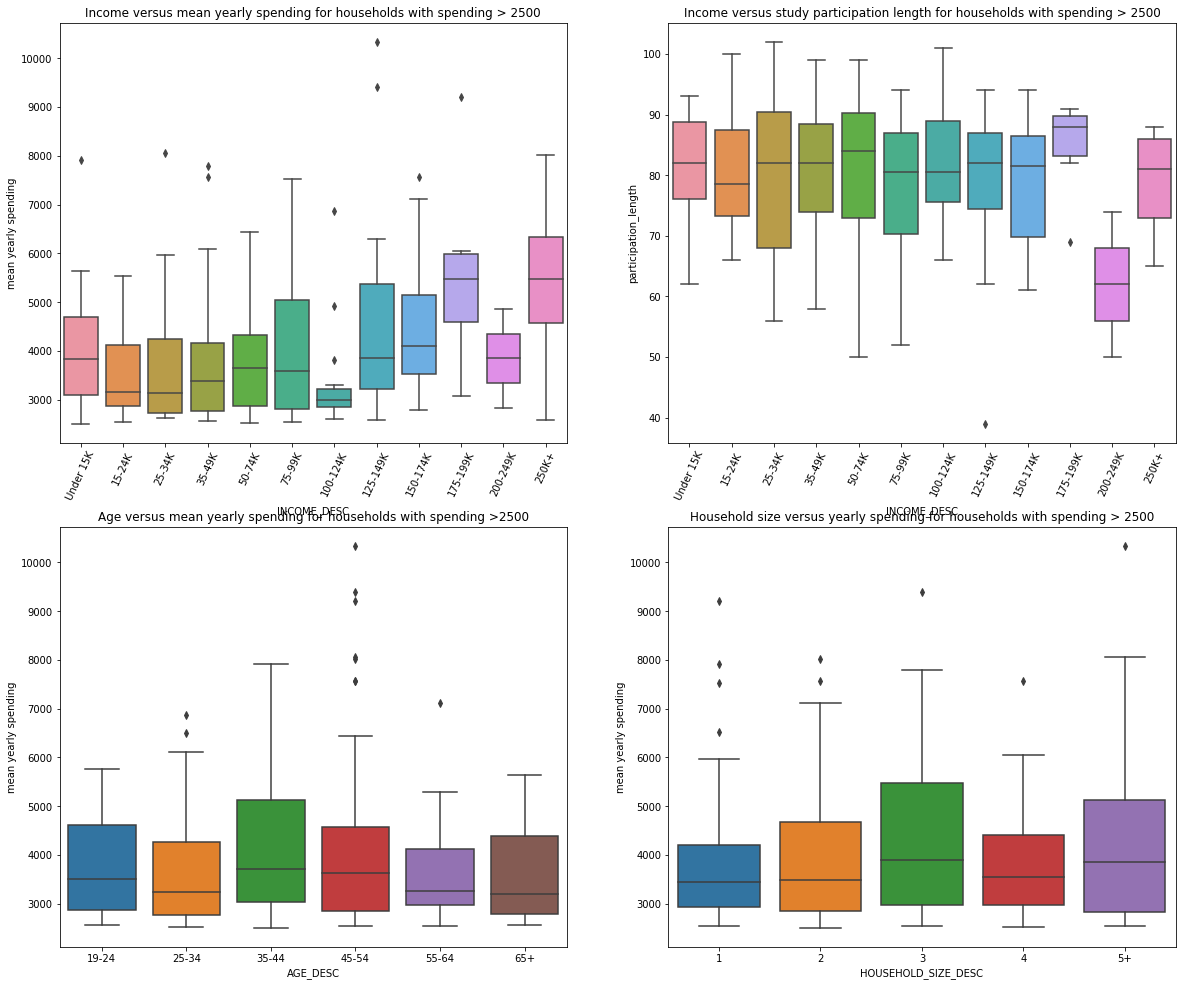

In [89]:
fig = plt.figure(figsize = (20,17))

ax1 = fig.add_subplot(221)
plt.xticks(rotation=65)
ax2 = fig.add_subplot(222)
plt.xticks(rotation=65)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.boxplot(x="INCOME_DESC", y='mean yearly spending', data=filtered_income, ax = ax1).set_title('Income versus mean yearly spending for households with spending > 2500')
sns.boxplot(x="INCOME_DESC", y='participation_length', data=filtered_income, ax = ax2).set_title('Income versus study participation length for households with spending > 2500')
sns.boxplot(x='AGE_DESC', y='mean yearly spending', data=filtered_income, ax = ax3).set_title('Age versus mean yearly spending for households with spending >2500')
sns.boxplot(x='HOUSEHOLD_SIZE_DESC', y='mean yearly spending', data=filtered_income, ax = ax4).set_title('Household size versus yearly spending for households with spending > 2500')

###### Comment: 
We don't have that many "loyal" shoppers (only 286 on 800) but at least we can see that most of those households participated for more than a year. Still the real number of "loyal" households is probably lower as there are households of 5+ that spent less than 3K/year which seems unreasonable if that is their only shopping. <br> 
**Note**: We see that there are some outliers, like households with income under 15K that spent around 8K per year on groceries. That seems like a miss-classification (probably wrong income). 

###### Conclusion for this part:
We learned that there are two categories of shoppers at this retailer; those that do most of their grocery shopping there every week and those who only do part of it. From this we want to know if we can find trends between what households shop and their demographic information. 

## Shopping trends and correlations:
- what did they buy weekly of each label
- how much did they spend on each label per week

In [69]:
#We have two interesting dataframes: 
#The demographic data for each household and their weekly spending, yearly spending and participation in the study.  
#print(participation_hh_dem.head(4))

#The transactions of all households and the labels of each product.
#print(trans_clean.head(4))

print(f"There are {len(trans_clean['LABEL'].unique()):n} unique labels")

There are 17 unique labels


Create a table with demographic data and number of weekly purchases for each produce label to get an idea of their average grocery shopping carts. 

In [70]:
weekly_cart_df = trns.create_weekly_cart_df(trans_clean, participation_per_hh)

#Save it to csv: 
if not os.path.exists("saved_structures"):
    os.makedirs("saved_structures")

weekly_cart_df.to_csv("saved_structures/weekly_cart_df.csv", sep ='\t', index=False)

weekly_cart_df.head(4)

,PRODUCE_QUANT,FAST FOOD & SNACKS_QUANT,HOUSEHOLDS_QUANT,DAIRY_QUANT,MEAT & SEAFOOD_QUANT,BAKERY_QUANT,CONDIMENTS_QUANT,BEVERAGES_QUANT,PET_QUANT,SMOKING_QUANT,FROZEN_QUANT,SPICE/HERBS_QUANT,TECHNOLOGY_QUANT,not found_QUANT,PHARMACY_QUANT,STATIONERY_QUANT,SPIRITS_QUANT
household_key,,,,,,,,,,,,,,,,,
1,6.469697,8.318182,2.969697,2.424242,2.287879,2.606061,0.378788,1.712121,0.151515,0.075758,0.545455,0.227273,0.545455,0.060606,0.136364,0.030303,0.0
2,4.514286,3.542857,4.685714,1.628571,2.285714,1.028571,0.514286,2.571429,0.828571,0.285714,0.314286,0.228571,0.114286,0.200000,0.114286,0.314286,0.0
3,8.333333,15.833333,2.277778,0.694444,5.472222,1.861111,1.277778,3.666667,1.888889,0.055556,2.000000,0.222222,0.055556,0.027778,0.055556,0.333333,0.0
4,0.920000,3.760000,1.720000,1.560000,1.800000,1.120000,0.400000,0.640000,0.000000,0.600000,2.000000,0.240000,0.000000,0.200000,0.080000,0.000000,0.0


In [72]:
#Now to this dataframe we can add any demographic info and try to cluster them according to weekly shopping habits. Do this on a separate notebook. 